## Notes

1. Make template notebooks including:
  - Fe isotopes with variable fractionation factors
  - Mg isotopes with constant fractionation factors
  - A trace element system- e.g., Zn? Maybe one that Carrie has published already?

Need to implement P in the trace element calculations for phasediagrams

Need to sort out the non-zero oscillating phase fractions when they should be zero.

NAN values for low P lz liquid



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import types
import pandas as pd
import warnings

In [2]:
# %cd ../
import pyMelt as m
# %cd dev

In [3]:
m.__version__

'3.dev0'

In [4]:
lz = m.lithologies.matthews.klb1()
px = m.lithologies.matthews.kg1()

In [5]:
mantle = m.mantle([lz, px], [0.9, 0.1], ['lz', 'px'])

In [50]:
column = mantle.adiabaticMelt(1600.0, dP=-0.004)

/Users/sm905/repos/pyMelt/pyMelt/mantle_class.py:476: UserWarning: Freezing prevented.
  _warn("Freezing prevented.")


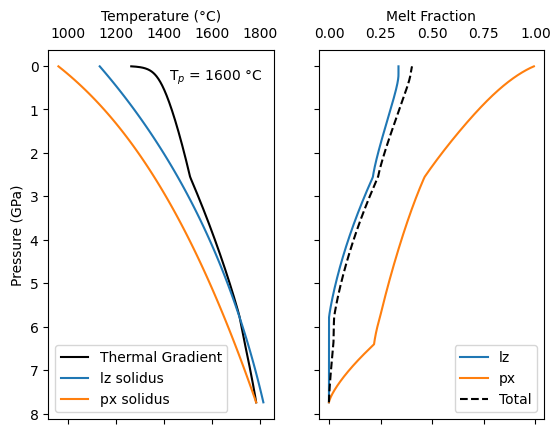

In [51]:
fig, ax = column.plot()

plt.show()

In [52]:
phasediag_klb1 = m.load_phaseDiagram('thermocalc_klb1')
phasediag_kg1 = m.load_phaseDiagram('thermocalc_kg1')

In [53]:
column.calculateChemistry(elements={'lz': {'MgO': np.nan,
                                           'FeO': np.nan},
                                    'px': {'MgO': np.nan,
                                           'FeO': np.nan},
                                    },
                          method='phase_diagram_major',
                          phaseDiagram={'lz': phasediag_klb1,
                                        'px': phasediag_kg1})

/Users/sm905/repos/pyMelt/pyMelt/chemistry/__init__.py:985: UserWarning: The MgO of rut could not be found.
  _warn('The ' + self.name + ' of ' + mineral + ' could not be found.')
/Users/sm905/repos/pyMelt/pyMelt/chemistry/__init__.py:985: UserWarning: The FeO of rut could not be found.
  _warn('The ' + self.name + ' of ' + mineral + ' could not be found.')


In [54]:
column.calculateMineralProportions(method='phase_diagram_major',
                                   phaseDiagram={'lz': phasediag_klb1,
                                                 'px': phasediag_kg1})

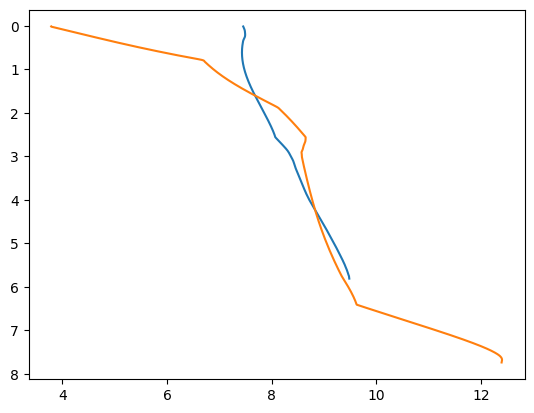

In [55]:
f, a = plt.subplots()

a.plot(column.composition['lz'].olv_FeO, column.composition['lz'].P)
a.plot(column.composition['px'].olv_FeO, column.composition['px'].P)

a.invert_yaxis()

plt.show()


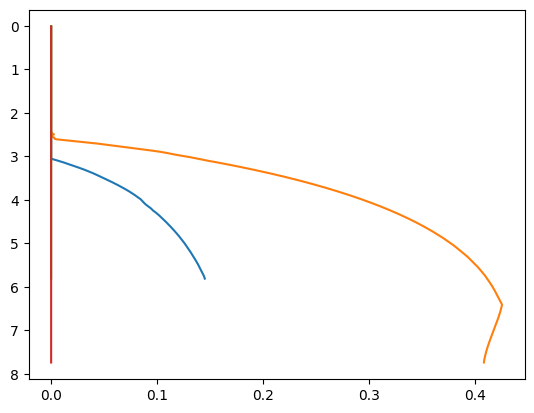

In [56]:
f, a = plt.subplots()

a.plot(column.composition['lz']['grt'], column.composition['lz'].P)
a.plot(column.composition['px']['grt'], column.composition['px'].P)

a.plot(column.composition['lz']['spn'], column.composition['lz'].P)
a.plot(column.composition['px']['spn'], column.composition['px'].P)

a.invert_yaxis()

plt.show()

In [57]:
column.composition['lz']

,P,T,F,liq_MgO,olv_MgO,cpx_MgO,opx_MgO,grt_MgO,spn_MgO,plg_MgO,...,opx_FeO,grt_FeO,spn_FeO,plg_FeO,olv,cpx,opx,grt,spn,plg
0,7.740578,1784.257506,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.736578,1784.152717,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.732578,1784.044517,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.728578,1783.934616,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.724578,1783.823440,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,0.028578,1296.137099,0.336941,13.300335,51.080370,18.815696,31.103540,3.258383e-23,0.0,0.0,...,4.489058,8.594817e-24,0.0,0.0,1.0,0.0,0.0,3.001576e-44,0.0,0.000000e+00
1929,0.024578,1290.474112,0.336941,13.299719,51.081536,18.809173,31.078427,3.491116e-23,0.0,0.0,...,4.491915,9.208712e-24,0.0,0.0,1.0,0.0,0.0,3.216093e-44,0.0,0.000000e+00
1930,0.020578,1283.644160,0.336941,13.298862,51.082676,18.803102,31.053179,3.532916e-23,0.0,0.0,...,4.494772,9.318969e-24,0.0,0.0,1.0,0.0,0.0,3.254707e-44,0.0,0.000000e+00
1931,0.016578,1275.086410,0.336941,13.297718,51.083781,18.797535,31.027797,3.354128e-23,0.0,0.0,...,4.497629,8.847369e-24,0.0,0.0,1.0,0.0,0.0,3.090077e-44,0.0,0.000000e+00


By mass conservation:

$ c_\textrm{Bulk} \delta_\textrm{Bulk} = \sum x_{ph} c_{ph} \delta_{ph}$

The definition of the fractionation factor:

$ \alpha = \frac{\delta_{min} + 10^3}{\delta_{melt} + 10^3} $

Rearranging:

$ \delta_{min} = \alpha (\delta_{melt} + 10^3) - 10^3 $

Substituting into the first expression:

$ c_\textrm{Bulk} \delta_\textrm{Bulk} = \sum x_{ph} c_{ph} [ \alpha_{ph} (\delta_{melt} + 10^3) - 10^3] + x_{melt} c_{melt} \delta_{melt}$

This rearranges to:

$ \delta_{melt} = \frac{c_{bulk} \delta_{bulk} - 10^3 \left[ \sum x_{ph} c_{ph} \alpha_{ph} - \sum x_{ph} c_{ph} \right]}{ \sum x_{ph} c_{ph} \alpha_{ph} + x_{melt} c_{melt}} $


In [101]:
from pyMelt.core import InputError

def calculateStableIsotopes(self, species, fractionationFactors, isotopeRatioLabel, 
                            bulk=0.0, fractionalExtraction=False, porosity=0.0, 
                            **kwargs):
    """
    Write some documentation here...

    Parameters
    ----------
    species: str 
        The species to calculate the stable isotope fractionation for. E.g., MgO.
        Must correspond to a species that has been calculated in the liquid and
        solid already.
    fractionationFactors : dict
        The mineral-liquid fractionation factors (1000 ln beta) for each mineral 
        in the calculation. The mineral name should be given as the key. A number 
        or a function may be given as the value. 
    isotopeRatioLabel : str
        The label to be applied to the results, e.g., 'd57Fe'.
    bulk : float or dict, default: 0
        The bulk isotope ratio, in the units of the calculation. If the calculation
        is simulating fractional melt extraction this number corresponds to the
        bulk value before melting. Use a dictionary to provide different bulk
        compositions for each lithology (with the lithology name as the key).
    fractionalExtraction : bool, default: False
        Controls wether calculation assumes batch or fractional melting for the
        purposes of the isotope fractionation calculation.
    porosity : float, default: 0.0
        If doing a fractional melting calculation, phi allows some residual melt to be
        retained at each step (i.e., continuous melting). Perfect fractional melting
        is assumed by default. If modelling a trace element system then this should
        be set to the same value used during the calculation of trace element
        concentrations.
    """

    warnings.warn("Isotope ratios for solid phases where their phase fraction "
                  "goes < 0.01 are masked as a temporary fix to problematic "
                  "imports.")
    
    # Prepare the columns for results, and check the fractionationFactors input is correct
    if isinstance(fractionationFactors, dict):
        phases = list(fractionationFactors.keys())
        colnames = ['liq_' + isotopeRatioLabel]
        for ph in phases:
            colnames.append(ph + '_' + isotopeRatioLabel)
    else:
        raise InputError("fractionationFactors must be a dict. If you want to use a single "
                         "fractionation factor for solid-liquid fractionation then specify "
                         "the same value for each mineral.")
    
    # Check the bulk composition input
    if isinstance(bulk, float): 
        if len(self.mantle.names) > 1:
            warnings.warn("A single bulk isotope ratio is being applied to every lithology. "
                        "Unless there is no isotopic heterogeneity this means the calculation "
                        "will only be indicative of general behaviour.")
        bulkval = bulk
        bulk = {}
        for lith in self.mantle.names:
            bulk[lith] = bulkval
    else:
        for bn in bulk:
            if bn not in self.mantle.names:
                raise InputError("The lithology {} was not recognised.".format(bn))
    
    # Check the species exists for each of the phases:
    for lith in self.mantle.names:
        for ph in phases + ['liq']:
            if ph + '_' + species not in self.composition[lith].columns:
                raise InputError("{0} was not found in {1} for {2}. The composition of each "
                                 "phase must have already been calculated.".format(species, ph, lith))

    for lith in self.mantle.names:

        results = np.full([np.shape(self.P)[0], len(phases) + 1], np.nan)
        
        for i, row in self.composition[lith].iterrows():

            if row['F'] > 1e-15:
                cliq = row['liq_' + species]
                xliq = row['F']

                # Assemble arrays for the summations:
                x = np.zeros(len(fractionationFactors))
                c = np.zeros(len(fractionationFactors))
                a = np.zeros(len(fractionationFactors))
                
                for n in range(len(phases)):
                    x[n] = row[phases[n]] * (1.0-xliq)
                    c[n] = row[phases[n] + '_' + species]
                    if callable(fractionationFactors[phases[n]]):
                        a[n] = fractionationFactors[phases[n]](row)
                    else:
                        a[n] = fractionationFactors[phases[n]]
                a = np.exp(a/1000)
                                        
            
                if fractionalExtraction is False:

                    cbulk = np.sum(c * x) + cliq * xliq

                    # delta_melt = (
                    #     (cbulk * (bulk[lith]/1e3 + 1) 
                    #     / (np.sum(x*c*a) + xliq * cliq)
                    #     - 1) *1e3
                    # )

                    delta_melt = (
                            (cbulk * bulk[lith] - 1e3 * (np.sum(x*c*a) - np.sum(x*c)))
                            / (np.sum(x*c*a) + xliq * cliq)
                        )
                    
                    results[i, 0] = delta_melt
                    results[i, 1:] = a * (delta_melt + 1e3) - 1e3

                    for j in range(len(x)):
                        if x[j] < 1e-2:
                            results[i, j+1] = np.nan
                
                elif fractionalExtraction == 'test':
                    # This is some temporary code implementing a poorly discretised fractional
                    # melting calculation for testing purposes.

                    row_prev = self.composition[lith].iloc[i-1]
                    F_prev = row_prev['F']

                    if F_prev > 1e-15:
                        
                        cbulk = np.sum(c * x) + cliq * (xliq - F_prev)

                        # delta_melt = (
                        #     (cbulk * (bulk[lith]/1e3 + 1) 
                        #     / (np.sum(x*c*a) + (xliq - F_prev) * cliq)
                        #     - 1) *1e3
                        # )

                        delta_melt = (
                            (cbulk * bulk[lith] - 1e3 * (np.sum(x*c*a) - np.sum(x*c)))
                            / (np.sum(x*c*a) + (xliq - F_prev) * cliq)
                        )
                        
                        results[i, 0] = delta_melt
                        results[i, 1:] = a * (delta_melt + 1e3) - 1e3

                        bulk[lith] = np.sum(c * x * results[i, 1:]) / np.sum(c*x)

                        for j in range(len(x)):
                            if x[j] < 1e-2:
                                results[i, j+1] = np.nan

                else:
                
                    row_prev = self.composition[lith].iloc[i-1]
                    F_prev = row_prev['F']

                    if F_prev > 1e-15:

                        bulk_a = (np.sum(x * c * a) + porosity * cliq) / (np.sum(x * c) + porosity * cliq)

                        cs_prev_denom = 0.0
                        for ph in phases:
                            cs_prev_denom += row_prev[ph + '_' + species] * row_prev[ph]
                        cs_prev_numer = cs_prev_denom * (bulk[lith] / 1e3 + 1)
                        
                        
                        
                        cs_denom = 0.0
                        for ph in phases:
                            cs_denom += row[ph + '_' + species] * row[ph]
                        D_denom = cs_denom / row['liq_' + species]
                        

                        D_numer = D_denom * bulk_a

                        cl_prev_denom = cs_prev_denom / D_denom 
                        cl_prev_numer = cs_prev_numer / D_numer

                        
                        norm = 0.0
                        pbar_numer = np.zeros(len(phases))
                        pbar_denom = np.zeros(len(phases))
                        for j in range(len(phases)):
                            ph = phases[j]
                            norm += (row_prev[ph] - row[ph])
                            pbar_numer[j] = (row_prev[ph] - row[ph]) * row[ph+'_'+species] / cliq * np.exp(fractionationFactors[ph] / 1000)
                            pbar_denom[j] = (row_prev[ph] - row[ph]) * row[ph+'_'+species] / cliq
                        Pbar_numer = np.sum(pbar_numer) / norm
                        Pbar_denom = np.sum(pbar_denom) / norm

                        # Calculate dcs/dX over integration range (Shaw eqns)
                        k1_numer = (cs_prev_numer - cl_prev_numer) / (1 - F_prev)
                        k1_denom = (cs_prev_denom - cl_prev_denom) / (1 - F_prev)

                        dF = (row['F'] - F_prev) / 2
                        k_cs = cs_prev_numer + k1_numer * dF
                        k_cl = k_cs * (1 - F_prev - dF) / (D_numer - Pbar_numer * (F_prev + dF))
                        k2_numer = (k_cs - k_cl) / (1 - (F_prev + dF))
                        k_cs = cs_prev_numer + k1_denom * dF
                        k_cl = k_cs * (1 - F_prev - dF) / (D_denom - Pbar_denom * (F_prev + dF))
                        k2_denom = (k_cs - k_cl) / (1 - (F_prev + dF))

                        dF = (row['F'] - F_prev) / 2
                        k_cs = cs_prev_numer + k2_numer * dF
                        k_cl = k_cs * (1 - F_prev - dF) / (D_numer - Pbar_numer * (F_prev + dF))
                        k3_numer = (k_cs - k_cl) / (1 - (F_prev + dF))
                        k_cs = cs_prev_numer + k2_denom * dF
                        k_cl = k_cs * (1 - F_prev - dF) / (D_denom - Pbar_denom * (F_prev + dF))
                        k3_denom = (k_cs - k_cl) / (1 - (F_prev + dF))

                        dF = (row['F'] - F_prev)
                        k_cs = cs_prev_numer + k3_numer * dF
                        k_cl = k_cs * (1 - F_prev - dF) / (D_numer - Pbar_numer * (F_prev + dF))
                        k4_numer = (k_cs - k_cl) / (1 - (F_prev + dF))
                        k_cs = cs_prev_numer + k3_denom * dF
                        k_cl = k_cs * (1 - F_prev - dF) / (D_denom - Pbar_denom * (F_prev + dF))
                        k4_denom = (k_cs - k_cl) / (1 - (F_prev + dF))
                        
                        
                        cs_numer = cs_prev_numer + (1 / 6) * (row['F'] - F_prev) * (k1_numer + 2*k2_numer + 2*k3_numer + k4_numer)
                        cl_numer = cs_numer / D_numer
                        cs_denom = cs_prev_denom + (1 / 6) * (row['F'] - F_prev) * (k1_denom + 2*k2_denom + 2*k3_denom + k4_denom)
                        cl_denom = cs_denom / D_denom


                        bulk[lith] = (cs_numer / cs_denom - 1) * 1e3
                        results[i, 0] = (cl_numer / cl_denom - 1) * 1e3
                        results[i, 1:] = a * (results[i,0] + 1e3) - 1e3

                        for j in range(len(x)):
                            if x[j] < 1e-2:
                                results[i, j+1] = np.nan
                    

        constructdf = pd.DataFrame(results, columns=colnames)
        # Check if the element exists already:
        repeats = [value for value in colnames if value in self.composition[lith].columns]
        self.composition[lith].drop(repeats, inplace=True, axis=1)
        self.composition[lith] = pd.concat([self.composition[lith], constructdf], axis=1)
    


column.calculateStableIsotopes = types.MethodType(calculateStableIsotopes, column)



In [102]:
column.composition['lz'].iloc[500].index

Index(['P', 'T', 'F', 'liq_MgO', 'olv_MgO', 'cpx_MgO', 'opx_MgO', 'grt_MgO',
       'spn_MgO', 'plg_MgO', 'liq_FeO', 'olv_FeO', 'cpx_FeO', 'opx_FeO',
       'grt_FeO', 'spn_FeO', 'plg_FeO', 'olv', 'cpx', 'opx', 'grt', 'spn',
       'plg', 'liq_d26Mg', 'olv_d26Mg', 'cpx_d26Mg', 'opx_d26Mg', 'grt_d26Mg',
       'spn_d26Mg'],
      dtype='object')

In [103]:
column.composition['lz'].iloc[500]

P            5.740578e+00
T            1.713583e+03
F            1.617411e-03
liq_MgO      2.483526e+01
olv_MgO      4.936445e+01
cpx_MgO      2.664549e+01
opx_MgO      3.362456e+01
grt_MgO      2.127510e+01
spn_MgO      2.212795e-41
plg_MgO      0.000000e+00
liq_FeO      1.291238e+01
olv_FeO      9.472684e+00
cpx_FeO      3.791486e+00
opx_FeO      3.620898e+00
grt_FeO      5.598102e+00
spn_FeO      6.506795e-42
plg_FeO      0.000000e+00
olv          5.772406e-01
cpx          2.787359e-01
opx          9.719343e-11
grt          1.440235e-01
spn          3.658167e-45
plg          4.468667e-58
liq_d26Mg   -1.100406e-02
olv_d26Mg   -1.100406e-02
cpx_d26Mg    7.300842e-02
opx_d26Mg             NaN
grt_d26Mg   -7.343624e-02
spn_d26Mg             NaN
Name: 500, dtype: float64

In [104]:
species = 'MgO'

def WangBetaEqn(T, P, a, b, c, d, e, f, g, h, i):
    return ((a + b*P + c*P**2) * 1e6 / T**2 + (d + e*P + f*P**2) * (1e6/T**2)**2 
            + (g + h*P + i*P**2) * (1e6/T**2)**3)

fractionationFactors = {'olv': WangBetaEqn(1473.15, 1.0, 2.076, 7.183e-2, -4.672e-4, 
                                           1.049e-1, -3.359e-3, 5.009e-5, -1.192e-2, 2.739e-4, -5.518e-6),
                        'cpx': WangBetaEqn(1473.15, 1.0, 2.246, 8.548e-2, -7.425e-4, 
                                           1.025e-1, -3.369e-3, 5.172e-5, -1.169e-2, 2.834e-4, -5.514e-6),
                        'opx': WangBetaEqn(1473.15, 1.0, 2.246, 6.206e-2, -0.733e-4, 
                                           0.675e-1, -0.141e-3, -8.619e-5, -0.817e-2, -0.657e-4, 8.825e-6),
                        'grt': WangBetaEqn(1473.15, 1.0, 1.302, 2.732-2, 1.784e-4, 
                                           0.492e-1, 1.266e-3, -4.067e-5, -0.554e-2, -1.482e-4, 3.787e-6),
                        'spn': WangBetaEqn(1473.15, 1.0, 3.058, 6.216e-2, -3.720e-4, 
                                           0.847e-1, -3.421e-3, 5.116e-5, -1.132e-2, 2.555e-4, -5.551e-6),}

olvVal = fractionationFactors['olv']
for ff in fractionationFactors:
    fractionationFactors[ff] = fractionationFactors[ff] - olvVal

fractionationFactors

{'olv': 0.0,
 'cpx': 0.08400987754851319,
 'opx': 0.0670626656393527,
 'grt': -0.06243481282005503,
 'spn': 0.44384180785840255}

In [105]:
for ff in fractionationFactors:
    print(np.exp(fractionationFactors[ff]/1000))

1.0
1.000084013406477
1.0000670649143901
0.9999375671361923
1.0004439403202077


In [106]:
column.calculateStableIsotopes('MgO', fractionationFactors, 'd26Mg', 
                               bulk=0.0, 
                               fractionalExtraction=False, parameter='delta', )

/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_40344/885091137.py:37: UserWarning: Isotope ratios for solid phases where their phase fraction goes < 0.01 are masked as a temporary fix to problematic imports.
  warnings.warn("Isotope ratios for solid phases where their phase fraction "
/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_40344/885091137.py:55: UserWarning: A single bulk isotope ratio is being applied to every lithology. Unless there is no isotopic heterogeneity this means the calculation will only be indicative of general behaviour.
  warnings.warn("A single bulk isotope ratio is being applied to every lithology. "


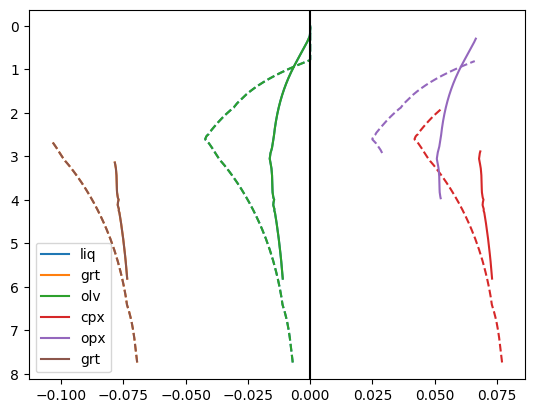

In [107]:
f, a = plt.subplots()

phases = ['liq', 'grt', 'olv', 'cpx', 'opx', 'grt']

for i in range(len(phases)):
    ph = phases[i]
    a.plot(column.composition['lz'][ph + '_d26Mg'], column.composition['lz']['P'], c='C'+str(i), label=ph)
    a.plot(column.composition['px'][ph + '_d26Mg'], column.composition['px']['P'], c='C'+str(i), ls='--')

a.invert_yaxis()

a.legend()

a.axvline(0, c='k')

plt.show()

/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_40344/885091137.py:37: UserWarning: Isotope ratios for solid phases where their phase fraction goes < 0.01 are masked as a temporary fix to problematic imports.
  warnings.warn("Isotope ratios for solid phases where their phase fraction "
/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_40344/885091137.py:55: UserWarning: A single bulk isotope ratio is being applied to every lithology. Unless there is no isotopic heterogeneity this means the calculation will only be indicative of general behaviour.
  warnings.warn("A single bulk isotope ratio is being applied to every lithology. "
/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_40344/885091137.py:37: UserWarning: Isotope ratios for solid phases where their phase fraction goes < 0.01 are masked as a temporary fix to problematic imports.
  warnings.warn("Isotope ratios for solid phases where their phase fraction "
/var/folders/s7/7xpdd_k536s0rc_3td0_83780000g

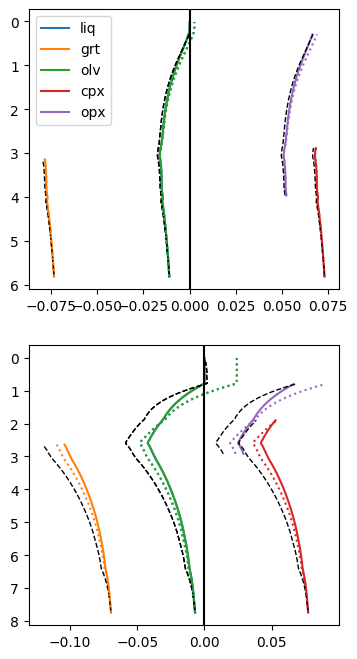

In [108]:
f, a = plt.subplots(2,1, figsize=(4,8))

phases = ['liq', 'grt', 'olv', 'cpx', 'opx']

column.calculateStableIsotopes('MgO', fractionationFactors, 'd26Mg', 
                               bulk=0.0, 
                               fractionalExtraction=False, parameter='delta', )

for i in range(len(phases)):
    ph = phases[i]
    a[0].plot(column.composition['lz'][ph + '_d26Mg'], column.composition['lz']['P'], c='C'+str(i), label=ph)
    a[1].plot(column.composition['px'][ph + '_d26Mg'], column.composition['px']['P'], c='C'+str(i), label=ph)

column.calculateStableIsotopes('MgO', fractionationFactors, 'd26Mg', 
                               bulk=0.0, 
                               fractionalExtraction=True, parameter='delta', )

for i in range(len(phases)):
    ph = phases[i]
    a[0].plot(column.composition['lz'][ph + '_d26Mg'], column.composition['lz']['P'],  ls='--', c='k', lw=1)
    a[1].plot(column.composition['px'][ph + '_d26Mg'], column.composition['px']['P'],  ls='--', c='k', lw=1)


column.calculateStableIsotopes('MgO', fractionationFactors, 'd26Mg', 
                               bulk=0.0, 
                               fractionalExtraction='test', parameter='delta', )

for i in range(len(phases)):
    ph = phases[i]
    a[0].plot(column.composition['lz'][ph + '_d26Mg'], column.composition['lz']['P'], c='C'+str(i), ls=':')
    a[1].plot(column.composition['px'][ph + '_d26Mg'], column.composition['px']['P'], c='C'+str(i), ls=':')


a[0].invert_yaxis()
a[1].invert_yaxis()

a[0].legend()

a[0].axvline(0, c='k')
a[1].axvline(0, c='k')


plt.show()




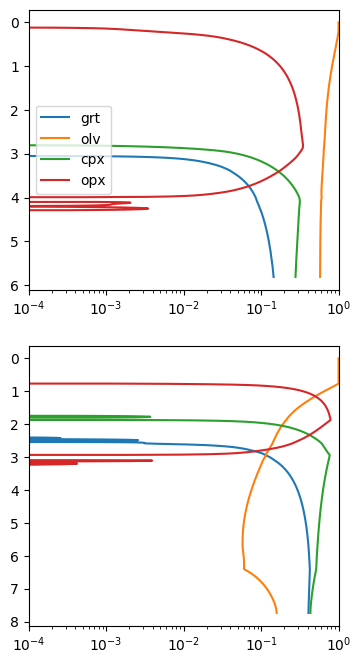

In [109]:
f, a = plt.subplots(2,1, figsize=(4,8))

phases = ['grt', 'olv', 'cpx', 'opx']

for ph in phases:
    a[0].plot(column.composition['lz'][ph], column.P, label=ph)
    a[1].plot(column.composition['px'][ph], column.P)

a[0].invert_yaxis()
a[1].invert_yaxis()

a[0].legend()

a[0].set_xscale('log')
a[1].set_xscale('log')
a[0].set_xlim(1e-4, 1)
a[1].set_xlim(1e-4, 1)

plt.show()
    

In [110]:
column.calculateStableIsotopes('MgO', fractionationFactors, 'd26Mg', 
                               bulk=0.0, 
                               fractionalExtraction=True, parameter='delta', )

/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_40344/885091137.py:37: UserWarning: Isotope ratios for solid phases where their phase fraction goes < 0.01 are masked as a temporary fix to problematic imports.
  warnings.warn("Isotope ratios for solid phases where their phase fraction "
/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_40344/885091137.py:55: UserWarning: A single bulk isotope ratio is being applied to every lithology. Unless there is no isotopic heterogeneity this means the calculation will only be indicative of general behaviour.
  warnings.warn("A single bulk isotope ratio is being applied to every lithology. "


In [111]:
results = []
for i in range(len(column.composition['px']-1)):
       results.append((np.sum(column.composition['px'].liq_MgO.iloc[1:i+1] 
              * column.composition['px'].liq_d26Mg.iloc[1:i+1] 
              * (np.array(column.composition['px'].F.iloc[1:i+1]) - np.array(column.composition['px'].F.iloc[:i])))
              / np.sum(column.composition['px'].liq_MgO.iloc[1:i+1] 
              * (np.array(column.composition['px'].F.iloc[1:i+1]) - np.array(column.composition['px'].F.iloc[:i])))))

/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_40344/2939358575.py:3: RuntimeWarning: invalid value encountered in scalar divide
  results.append((np.sum(column.composition['px'].liq_MgO.iloc[1:i+1]


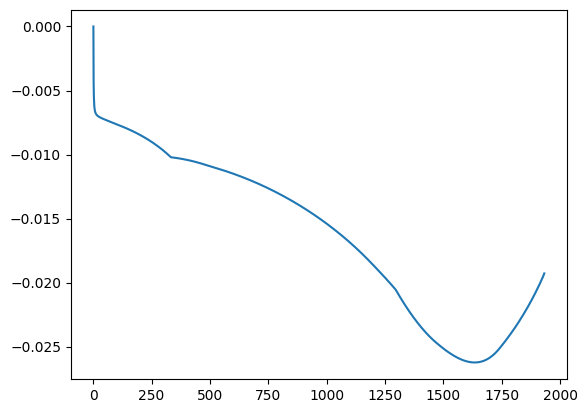

In [112]:
f, a = plt.subplots()

a.plot(range(len(results)), results)

In [113]:
column.calculateStableIsotopes('MgO', fractionationFactors, 'd26Mg', 
                               bulk=0.0, 
                               fractionalExtraction='test', parameter='delta', )

/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_40344/885091137.py:37: UserWarning: Isotope ratios for solid phases where their phase fraction goes < 0.01 are masked as a temporary fix to problematic imports.
  warnings.warn("Isotope ratios for solid phases where their phase fraction "
/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_40344/885091137.py:55: UserWarning: A single bulk isotope ratio is being applied to every lithology. Unless there is no isotopic heterogeneity this means the calculation will only be indicative of general behaviour.
  warnings.warn("A single bulk isotope ratio is being applied to every lithology. "


/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_40344/3624195442.py:3: RuntimeWarning: invalid value encountered in scalar divide
  results.append((np.sum(column.composition['px'].liq_MgO.iloc[1:i+1]


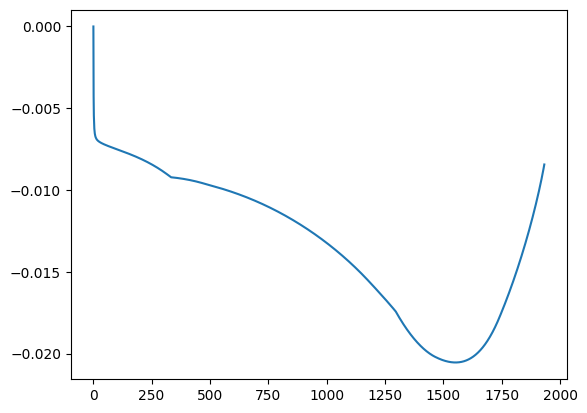

In [114]:
results = []
for i in range(len(column.composition['px']-1)):
       results.append((np.sum(column.composition['px'].liq_MgO.iloc[1:i+1] 
              * column.composition['px'].liq_d26Mg.iloc[1:i+1] 
              * (np.array(column.composition['px'].F.iloc[1:i+1]) - np.array(column.composition['px'].F.iloc[:i])))
              / np.sum(column.composition['px'].liq_MgO.iloc[1:i+1] 
              * (np.array(column.composition['px'].F.iloc[1:i+1]) - np.array(column.composition['px'].F.iloc[:i])))))
       
f, a = plt.subplots()

a.plot(range(len(results)), results)

In [40]:
np.array(column.composition['lz'].F)

array([0.        , 0.        , 0.        , ..., 0.26978132, 0.26978132,
       0.26978132])